In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
#np.random.seed(42)

1- Generating 2D data

In [2]:
data, clusters = make_blobs(n_samples = 500, centers = 4, random_state=11, cluster_std=2)

df = pd.DataFrame(data, columns=["f1", "f2"])

In [3]:
df.head()

,f1,f2
0,-0.789604,5.396426
1,-2.759954,7.765041
2,-10.706394,-0.502502
3,-7.996988,-8.914794
4,-7.265154,-1.267258


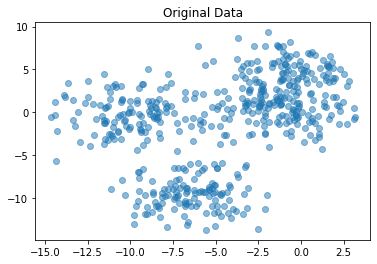

In [4]:
plt.scatter(df["f1"], df["f2"], alpha=0.5)
plt.title("Original Data")
plt.show()

In [5]:
def k_mean(df, k, epoch):
    '''
    df: Training set
    k: Number of clusters
    epoch: Number of iteration
    '''
    distortion = 0
    c = []
    for i in range(k):
        x = np.random.uniform(np.min(df["f1"]), np.max(df["f1"]))
        y = np.random.uniform(np.min(df["f2"]), np.max(df["f2"]))
        c.append([x, y])
        
    for epo in range(epoch):
        # Caluculate distance between each point with each centriod
        for i in df.index:
            dictances = []
            
            for j in range(k):  
                #print(df.iloc[i, :2])
                #print(c[j])
                dictances.append(np.linalg.norm(df.iloc[i, :2] - c[j]))
                
            # Assign for each point the cluster with minumim distance      
            df.loc[i, "cluster"] = np.argmin(dictances)
            df.loc[i, "distance"] = np.min(dictances)
            
        # Update centriod's values
        new_clusters = df.groupby("cluster").mean()

        condition = np.array_equal(new_clusters.values, c)

        if condition:
            break
        else:
            # Update cluster's values
            for i in range(new_clusters.shape[0]):
                c[i] = np.array(new_clusters.iloc[i, :2])
    
    distortion = df["distance"].mean() 
    return df["cluster"], distortion



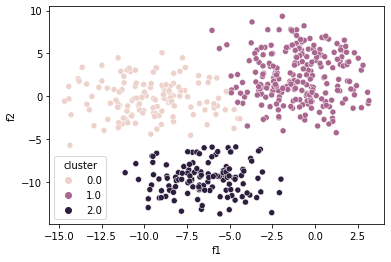

In [6]:
df["cluster"], distortion = k_mean(df, k=3, epoch=100)
sns.scatterplot(x="f1", y="f2", hue="cluster", data=df)
plt.show()

In [7]:
def draw_elbow_method(df, possible_k, epoch=100):
    distortions = [0]
    k = [0]
    for i in range(1, possible_k +1): 
        distortions.append(k_mean(df, k=i, epoch=100)[1])
        k.append(i)
        #if distortions[i-1] == distortions[i]:
           # break
    plt.plot(k, distortions, "o")
    plt.show()

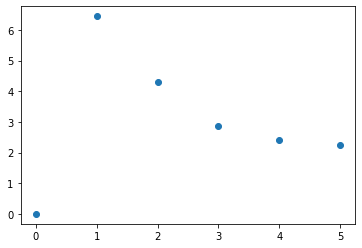

In [8]:
draw_elbow_method(df, 5)